In [1]:
import tensorflow as tf
import utils_img_rec as ut
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import pathlib
import time

from IPython import display
import seaborn as sns

from sklearn.metrics import confusion_matrix

inicio = time.time()

In [2]:
DATA_DIR = '../bases/pickle/imagens/cifar10/cifar10-train-pickle.pickle'

TEST_DIR = '../bases/pickle/imagens/cifar10/cifar10-test-pickle.pickle'

IMG_SIZE = 32
teste_treino = True
numero_de_canais = 3

DATA_DIR = pathlib.Path(DATA_DIR)
TEST_DIR = pathlib.Path(TEST_DIR)

In [3]:
model = tf.keras.models.load_model('../modelos_salvos/tensorflow/modelo_cifar10 - acc = 0.6366.h5')
#model.summary()

In [4]:
pickle_in = open(DATA_DIR,"rb")
data_train = pickle.load(pickle_in)

if teste_treino:
    pickle_in = open(TEST_DIR,"rb")
    data_test = pickle.load(pickle_in)

In [5]:
#CATEGORIES_dict = {}
CATEGORIES = ut.get_classes(data_test)
CATEGORIES.sort()
try:
    CATEGORIES.remove('.ipynb_checkpoints')
except:
    pass
print(CATEGORIES)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [6]:
train_X, train_y = ut.prep_data(data_train, CATEGORIES, IMG_SIZE, numero_de_canais, shuffle=False)
#print("Number of training images: ",len(data_train))
print('Entradas de treino - {} - ({}x{})\n'.format( train_X.shape[0], train_X.shape[1], train_X.shape[2] ))

if teste_treino:
    test_X, test_y = ut.prep_data(data_test, CATEGORIES, IMG_SIZE, numero_de_canais, shuffle=False)
    #print("Number of test images: ",len(data_test))
    print('Entradas de teste - {} - ({}x{})'.format( test_X.shape[0], test_X.shape[1], test_X.shape[2] ))
train_X=np.array(train_X/255.0)
train_y=np.array(train_y)
if teste_treino:
    test_X=np.array(test_X/255.0)
    test_y=np.array(test_y)

Entradas de treino - 50000 - (32x32)

Entradas de teste - 10000 - (32x32)


### Avaliação com dados de treino

In [7]:
predicoes = np.argmax(model.predict(train_X), axis=1)
true_labels = np.array(data_train)[0:,1]

true = np.asarray(true_labels).astype('float32')# isso serve para corrigir erro na conversão true_labes para um tensor
pred = np.asarray(predicoes).astype('float32')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


1563/1563 [==============================] - 31s 20ms/step - loss: 0.7555 - accuracy: 0.7486

 Acuracia do teste:  0.7485600113868713 



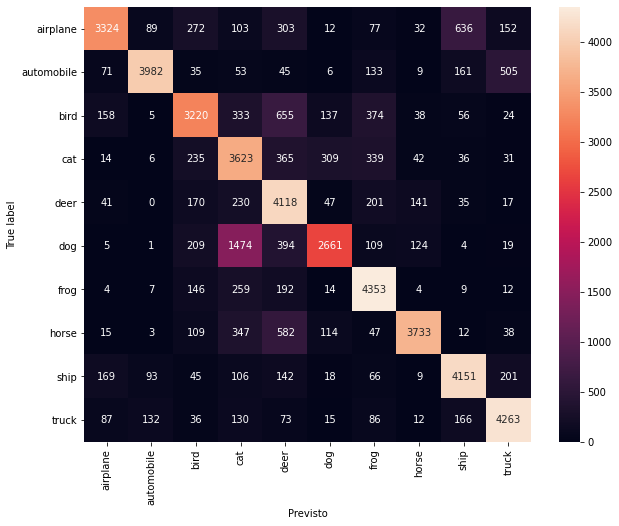

In [8]:
train_loss, train_acc = model.evaluate(train_X, train_y, verbose=1)
print('\n Acuracia do teste: ',train_acc,'\n')

confusion_mtx = confusion_matrix(true, pred)

#confusion_mtx = tf.math.confusion_matrix(true, pred) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('True label')
plt.show()

### Avaliação com dados de teste

In [9]:
predicoes = np.argmax(model.predict(test_X), axis=1)
true_labels = np.array(data_test)[0:,1]

true = np.asarray(true_labels).astype('float32')
pred = np.asarray(predicoes).astype('float32')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


313/313 [==============================] - 6s 20ms/step - loss: 1.0703 - accuracy: 0.6366

 Acuracia do teste:  0.6366000175476074 



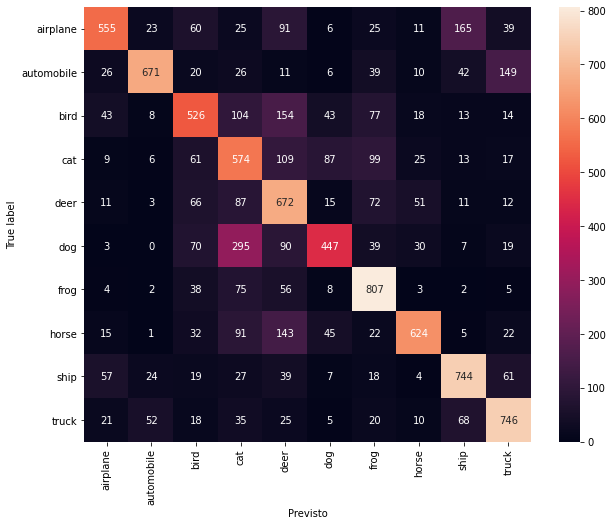

In [10]:
train_loss, train_acc = model.evaluate(test_X, test_y, verbose=1)
print('\n Acuracia do teste: ',train_acc,'\n')

confusion_mtx = confusion_matrix(true, pred)

#confusion_mtx = tf.math.confusion_matrix(true, pred) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('True label')
plt.show()

## Avaliando todos os dados juntos

In [11]:
data = np.concatenate((data_train, data_test), axis=0)
X = np.concatenate((train_X, test_X), axis=0)
true_y = np.concatenate((train_y, test_y), axis=0)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [12]:
predicoes = np.argmax(model.predict(X), axis=1)
true_labels = np.array(data)[0:,1]

true = np.asarray(true_labels).astype('float32')
pred = np.asarray(predicoes).astype('float32')

1875/1875 [==============================] - 43s 23ms/step - loss: 0.8079 - accuracy: 0.7299

 Acuracia todos os testes:  0.7299000024795532 



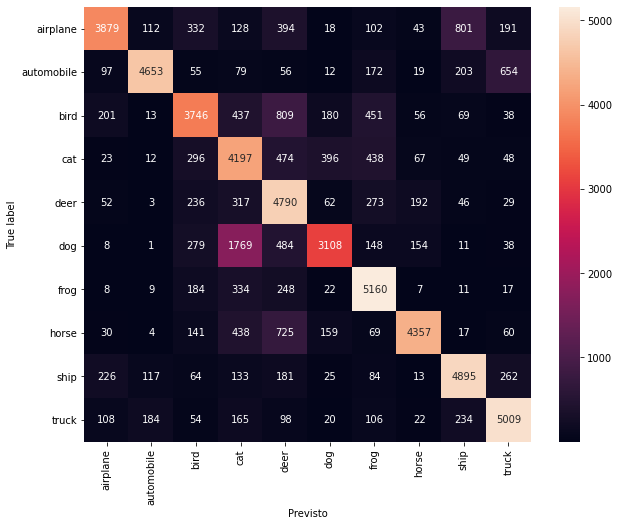

In [13]:
train_loss, train_acc = model.evaluate(X, true_y, verbose=1)
print('\n Acuracia todos os testes: ',train_acc,'\n')

confusion_mtx = confusion_matrix(true, pred)

#confusion_mtx = tf.math.confusion_matrix(true, pred) 

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=CATEGORIES, yticklabels=CATEGORIES, annot=True, fmt='g')
plt.xlabel('Previsto')
plt.ylabel('True label')
plt.show()

In [14]:
print('Tempo de execução: ', time.time() - inicio)

Tempo de execução:  164.70228791236877
